In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
data = pd.read_csv('Marketing_Campaign_Train.csv',parse_dates=['Dt_Customer'])
upper_lim = data['Income'].quantile(.95)
lower_lim = data['Income'].quantile(.05)

data = data[(data['Income'] < upper_lim) & (data['Income'] > lower_lim)]
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,176,1980,2n Cycle,Single,67506.0,0,1,2014-01-02,73,90,...,3,0,0,0,0,0,0,3,11,0
2,9262,1984,2n Cycle,Together,32414.0,0,0,2013-07-04,11,20,...,7,1,0,0,0,0,0,3,11,0
3,5252,1969,Graduation,Divorced,23910.0,1,0,2012-10-26,80,16,...,7,0,0,0,0,0,0,3,11,0
4,4261,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,3,0,0,1,1,0,0,3,11,1
5,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,4,0,0,0,0,0,0,3,11,0


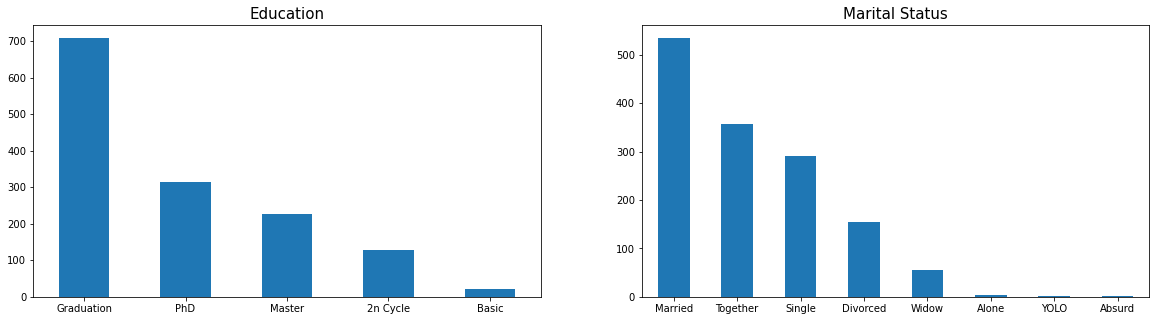

In [3]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1,)
plt.title('Education', fontsize=15)
data['Education'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

plt.subplot(1,2,2)
plt.title('Marital Status', fontsize=15)
data['Marital_Status'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

plt.show()

<Figure size 1440x360 with 0 Axes>

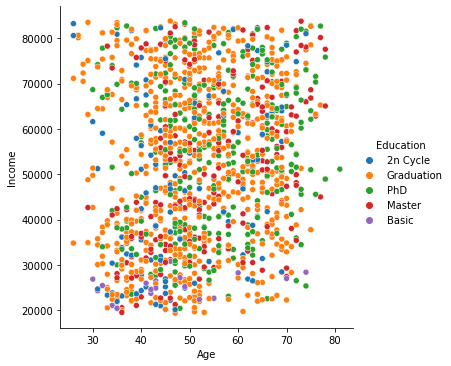

In [4]:
data['Age']=2021 - data['Year_Birth']
data = data.drop(data[data.Age>100].index[0])

plt.figure(figsize=(20,5))
sns.relplot(x='Age', y='Income', data=data, hue='Education')
plt.show()

In [5]:
data['Children'] = data.Kidhome +  data.Teenhome

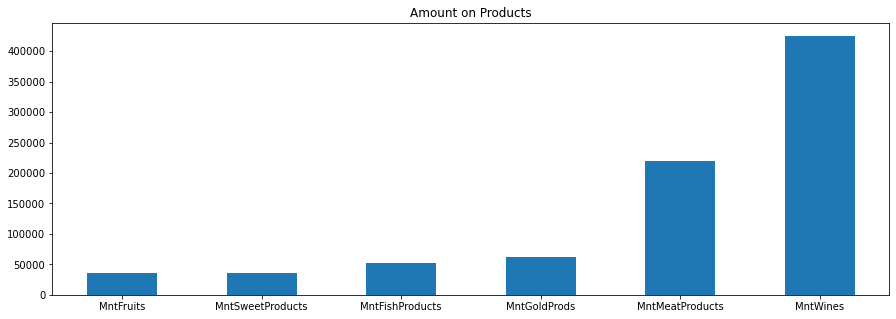

In [6]:
data['Amount'] = data[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum(axis=1)

data[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum().sort_values().plot(kind='bar', figsize=(15,5), title='Amount on Products')
plt.xticks(rotation=0)
plt.show()

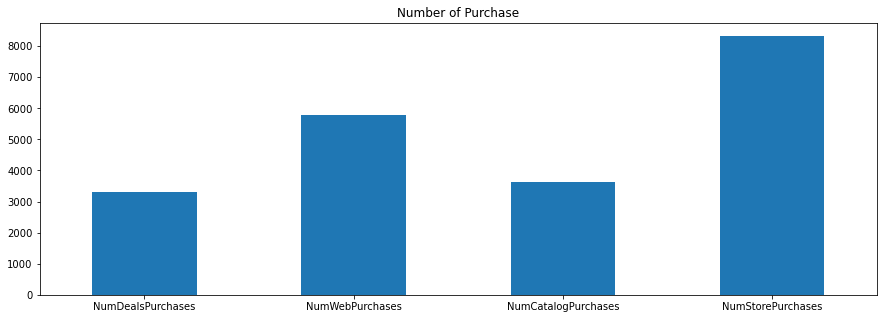

In [7]:
data['Frequency'] = data[['NumDealsPurchases', 'NumWebPurchases',
      'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

data[['NumDealsPurchases', 'NumWebPurchases',
      'NumCatalogPurchases', 'NumStorePurchases']].sum().plot(kind='bar',figsize=(15,5), 
                                                              title='Number of Purchase')
plt.xticks(rotation=0)
plt.show()

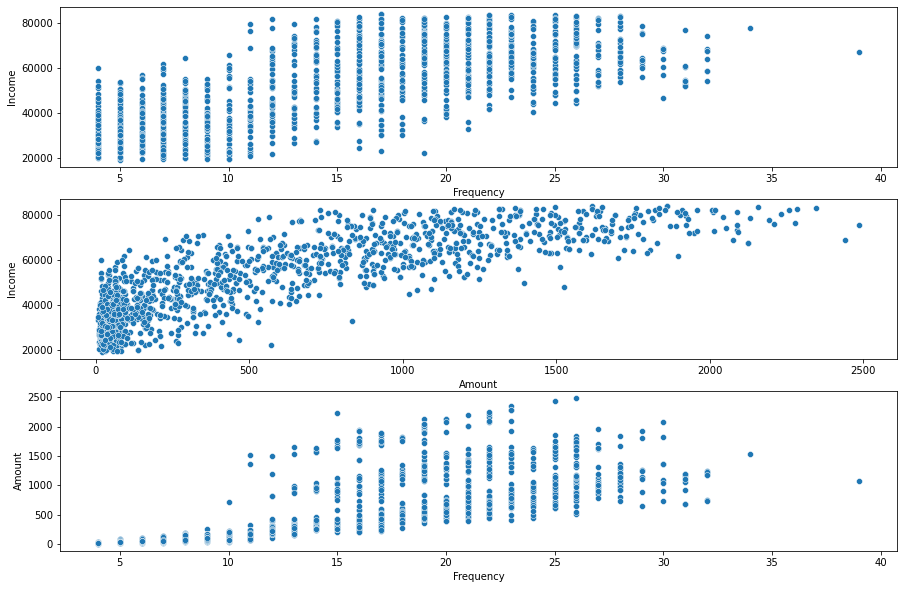

In [8]:
plt.figure(figsize=(15,10))

plt.subplot(311)
sns.scatterplot(x='Frequency', y='Income', data=data)

plt.subplot(312)
sns.scatterplot(x='Amount', y='Income', data=data)

plt.subplot(313)
sns.scatterplot(x='Frequency', y='Amount', data=data)

plt.show()

In [9]:
data['Year_Registered'] = 2021 - data['Dt_Customer'].dt.year
data['Education'] = pd.Categorical(data['Education']).codes
data['Score'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']].sum(axis=1)
data['Age_Cat'] = pd.Categorical(pd.cut(data['Age'],3)).codes
data['Marital_Status'] = data.Marital_Status.replace(['Widow', 'Married', 'Alone','Absurd', 'YOLO'],'Others')
data['Marital_Status'] = pd.Categorical(data['Marital_Status']).codes

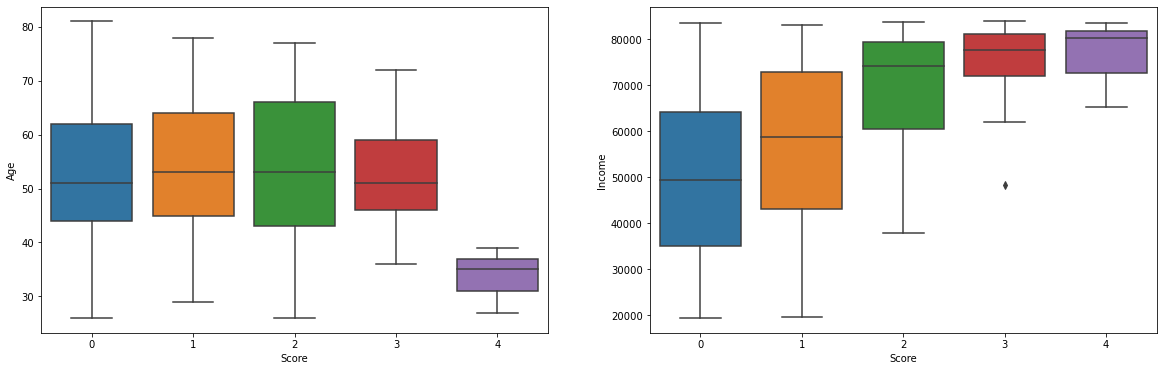

In [10]:
plt.figure(figsize=(20,6))

plt.subplot(121)
sns.boxplot(x="Score", y='Age', data=data)

plt.subplot(122)
sns.boxplot(x="Score", y='Income', data=data)

plt.show()

In [11]:
minmax = MinMaxScaler()

data= data[['Education', 'Marital_Status', 'Income','Age','Age_Cat', 'Children', 'Amount', 
      'Frequency', 'Year_Registered','Recency','NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5','Complain','Score','Response']]

data[['Income','Amount','Frequency','Recency']] = minmax.fit_transform(data[['Income','Amount','Frequency','Recency']])
data.head()

,Education,Marital_Status,Income,Age,Age_Cat,Children,Amount,Frequency,Year_Registered,Recency,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Score,Response
1,0,2,0.746864,41,0,1,0.130347,0.228571,7,0.737374,3,0,0,0,0,0,0,0,0
2,0,3,0.202658,37,0,0,0.017756,0.028571,8,0.111111,7,0,0,1,0,0,0,1,0
3,2,0,0.070778,52,1,1,0.023810,0.057143,9,0.808081,7,0,0,0,0,0,0,0,0
4,4,2,0.984042,75,2,0,0.527441,0.628571,9,0.232323,3,1,0,0,0,1,0,2,1
5,4,0,0.730890,45,1,1,0.274818,0.457143,8,1.000000,4,0,0,0,0,0,0,0,0


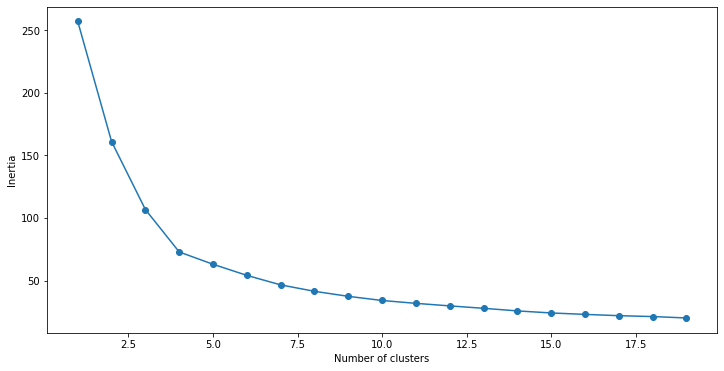

In [12]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(data[['Amount','Frequency','Recency']])
    SSE.append(kmeans.inertia_)

# # converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
# k means using 3 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(data[['Amount','Frequency','Recency']])
data['pred_cluster'] = kmeans.predict(data[['Amount','Frequency','Recency']])

In [14]:
data[['Income','Amount','Frequency','Recency']] = minmax.inverse_transform(data[['Income','Amount','Frequency','Recency']])

data.head()

,Education,Marital_Status,Income,Age,Age_Cat,Children,Amount,Frequency,Year_Registered,Recency,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Score,Response,pred_cluster
1,0,2,67506.0,41,0,1,331.0,12.0,7,73.0,3,0,0,0,0,0,0,0,0,1
2,0,3,32414.0,37,0,0,52.0,5.0,8,11.0,7,0,0,1,0,0,0,1,0,2
3,2,0,23910.0,52,1,1,67.0,6.0,9,80.0,7,0,0,0,0,0,0,0,0,1
4,4,2,82800.0,75,2,0,1315.0,26.0,9,23.0,3,1,0,0,0,1,0,2,1,0
5,4,0,66476.0,45,1,1,689.0,20.0,8,99.0,4,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

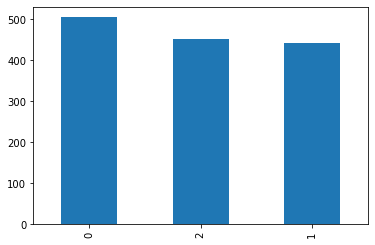

In [15]:
data.pred_cluster.value_counts().plot(kind='bar')

In [26]:
data.groupby('pred_cluster')[['Amount','Recency','Frequency','pred_cluster']].agg({'Amount':'mean','Recency':'mean','Frequency':'mean', 'pred_cluster':'count'})



,Amount,Recency,Frequency,pred_cluster
pred_cluster,,,,
0,1208.348515,43.764356,22.433663,505
1,317.361991,77.441176,12.131222,442
2,177.730088,24.767699,9.732301,452


<AxesSubplot:xlabel='pred_cluster', ylabel='Income'>

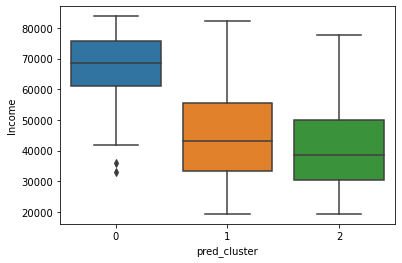

In [32]:
sns.boxplot(x='pred_cluster', y='Income', data=data)

<AxesSubplot:xlabel='pred_cluster', ylabel='Frequency'>

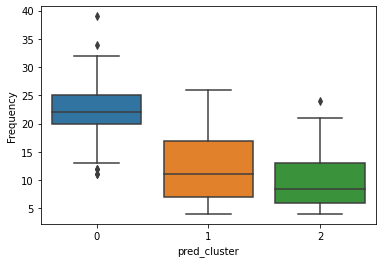

In [30]:
sns.boxplot(x='pred_cluster', y='Frequency', data=data)

<AxesSubplot:xlabel='pred_cluster', ylabel='Amount'>

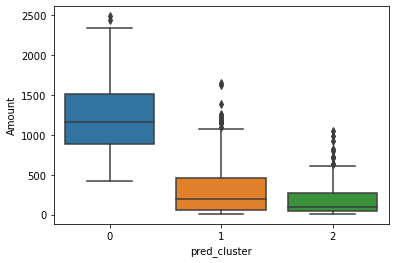

In [31]:
sns.boxplot(x='pred_cluster', y='Amount', data=data)

<AxesSubplot:xlabel='Education', ylabel='pred_cluster'>

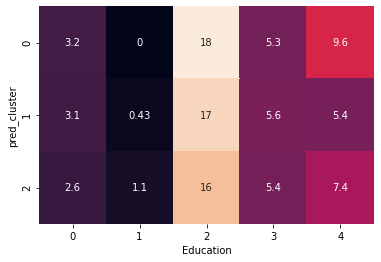

In [49]:
sns.heatmap((pd.crosstab(data['pred_cluster'] ,data['Education'])/data.shape[0])*100, annot=True, cbar=False)

In [50]:
data.head()

,Education,Marital_Status,Income,Age,Age_Cat,Children,Amount,Frequency,Year_Registered,Recency,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Score,Response,pred_cluster
1,0,2,67506.0,41,0,1,331.0,12.0,7,73.0,3,0,0,0,0,0,0,0,0,1
2,0,3,32414.0,37,0,0,52.0,5.0,8,11.0,7,0,0,1,0,0,0,1,0,2
3,2,0,23910.0,52,1,1,67.0,6.0,9,80.0,7,0,0,0,0,0,0,0,0,1
4,4,2,82800.0,75,2,0,1315.0,26.0,9,23.0,3,1,0,0,0,1,0,2,1,0
5,4,0,66476.0,45,1,1,689.0,20.0,8,99.0,4,0,0,0,0,0,0,0,0,1
